In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
with open("../data/processed/epfl_courses.json") as file:
    epfl_courses = json.load(file)
with open("../data/processed/epfl_programs.json") as file:
     epfl_programs = json.load(file)
with open("../data/processed/epfl_studyplans.json") as file:
     epfl_studyplans = json.load(file)

In [3]:
programs = pd.DataFrame.from_dict(epfl_programs, orient='index')
courses = pd.DataFrame.from_dict(epfl_courses, orient='index')
studyplans = pd.DataFrame.from_dict(epfl_studyplans, orient='index')

## Programs

In [4]:
program_counts = programs.fillna(0).applymap(lambda a: a if a == 0 else len(a)).T
program_counts.head(5)

,propedeutics,bachelor,master,minor,doctoral_school
Architecture,14,38,80,0,0
Chemistry and Chemical Engineering,18,23,0,0,0
Civil Engineering,20,34,68,0,0
Communication Systems,16,45,0,0,0
Computer Science,16,45,78,0,0


In [8]:
levels = programs.index
level_dict = {
    level: program_counts[level][program_counts[level]!=0]
    for level in levels
}

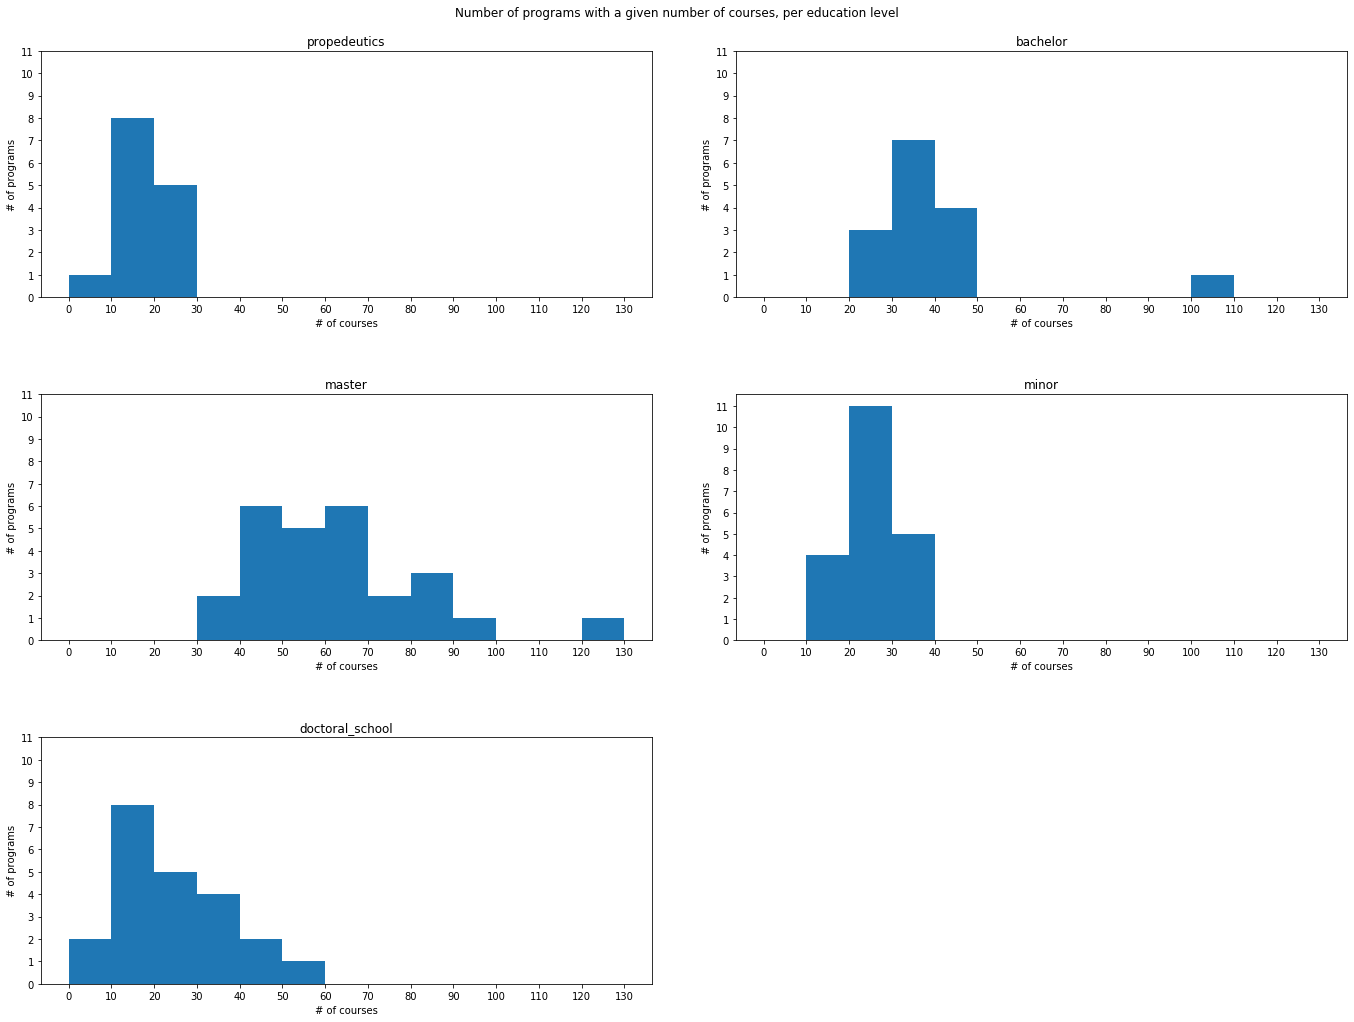

In [10]:
#Plotting the histograms of number of courses available per program on a given level
fig = plt.figure(figsize=(20, 15))

fig.suptitle('Number of programs with a given number of courses, per education level')

rows = 3
columns = 2

for i, level in enumerate(levels):
    ax = fig.add_subplot(rows, columns, i+1)
    ax.hist(level_dict[level], bins=range(0,140,10))
    ax.set_title(level)
        
    ax.set_xticks(range(0,140,10))
    ax.set_yticks(range(12))
        
    ax.set_xlabel('# of courses')
    ax.set_ylabel('# of programs')
fig.tight_layout(pad=5.0)
plt.show()

In [7]:
master = level_dict['master']
master[master>120]

Electrical and Electronics Engineering    129
Name: master, dtype: int64

In [ ]:
bachelor = level_dict['bachelor']
bachelor[bachelor>90]